<a href="https://colab.research.google.com/github/isuishi620/1-n_octave_analysis/blob/main/hoge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import random
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model

In [ ]:
# シードの固定
tf.random.set_seed(42)
np.random.seed(42)
random.seed(42)

# 訓練データの生成

[Text(0.5, 0, 'x1'), Text(0, 0.5, 'x2')]

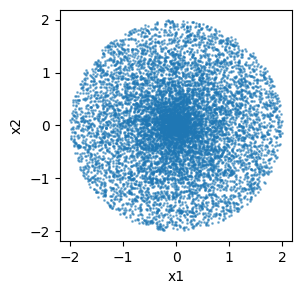

In [ ]:
# サンプル数
samples = 10000

# ノルム
r_n = np.random.uniform(0,2,samples)

# ファイ
phi_n = np.random.uniform(0,2*np.pi,samples)

# 訓練データの生成
x_n = np.array([r_n*np.sin(phi_n), r_n*np.cos(phi_n)])

# 可視化
_, ax = plt.subplots(figsize=(3,3))
ax.scatter(x_n[0,:], x_n[1,:],s=1,alpha=0.5)
ax.set(xlabel='x1',ylabel='x2')

# モデルの作成
損失関数は以下の$\mathcal{J}_θ^{RE}$とする。
$$
\mathcal{J}_θ^{RE}=\frac{1}{M_u}\sum_{i=1}^{M_u}\mathcal{A}_θ(x_i^{(u)}) \\
\mathcal{A}_θ(x_t) = ||x_t-\mathcal{D}_θ(\mathcal{E}_θ(x_t))||_2^2
$$

In [ ]:
# エンコーダー部分の定義
input_layer = Input(shape=(2,))
encoder = Dense(20, activation='sigmoid', kernel_initializer='glorot_normal')(input_layer)
encoder = Dense(10, activation='sigmoid', kernel_initializer='glorot_normal')(encoder)

# デコーダー部分の定義
decoder = Dense(20, activation='sigmoid', kernel_initializer='glorot_normal')(encoder)
output_layer = Dense(2, kernel_initializer='glorot_normal')(decoder)

# オートエンコーダーモデルの構築
model = Model(inputs=input_layer, outputs=output_layer)

# オプティマイザーの設定
optimizer = tf.keras.optimizers.Adam(learning_rate=10e-3, amsgrad=True)

# 損失関数(J_θ^RE)の定義
def custom_loss_function(y_true, y_pred):
    return tf.reduce_mean(tf.square(tf.norm(y_true - y_pred, axis=1)))

# モデルのコンパイル
model.compile(optimizer=optimizer, loss=custom_loss_function)

# モデルのサマリー表示
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 2)]               0         
                                                                 
 dense (Dense)               (None, 20)                60        
                                                                 
 dense_1 (Dense)             (None, 10)                210       
                                                                 
 dense_2 (Dense)             (None, 20)                220       
                                                                 
 dense_3 (Dense)             (None, 2)                 42        
                                                                 
Total params: 532 (2.08 KB)
Trainable params: 532 (2.08 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


# 学習のパラメータの設定

In [ ]:
# トレーニングデータのサイズ
num_samples = x_n.shape[-1]

# ミニバッチのサイズ
batch_size = 500

# トレーニングの更新回数
updates = 5000

# 1エポックあたりのバッチ数を計算
batches_per_epoch = np.ceil(num_samples / batch_size)

# 必要な総エポック数を計算
epochs = int(np.ceil(updates / batches_per_epoch))
print(f'1エポック当たりのバッチ数:{batches_per_epoch}')
print(f'エポック数:{epochs}')

1エポック当たりのバッチ数:20.0
エポック数:250


# 学習

In [ ]:
history = model.fit(x_n.T, x_n.T,
                    batch_size=batch_size,
                    epochs=epochs)

Epoch 1/250
20/20 [==============================] - 5s 9ms/step - loss: 1.6902
Epoch 2/250
20/20 [==============================] - 0s 7ms/step - loss: 1.2717
Epoch 3/250
20/20 [==============================] - 0s 5ms/step - loss: 1.0483
Epoch 4/250
20/20 [==============================] - 0s 6ms/step - loss: 0.6641
Epoch 5/250
20/20 [==============================] - 0s 6ms/step - loss: 0.4621
Epoch 6/250
20/20 [==============================] - 0s 7ms/step - loss: 0.2364
Epoch 7/250
20/20 [==============================] - 0s 6ms/step - loss: 0.1032
Epoch 8/250
20/20 [==============================] - 0s 5ms/step - loss: 0.0742
Epoch 9/250
20/20 [==============================] - 0s 5ms/step - loss: 0.0569
Epoch 10/250
20/20 [==============================] - 0s 7ms/step - loss: 0.0436
Epoch 11/250
20/20 [==============================] - 0s 7ms/step - loss: 0.0333
Epoch 12/250
20/20 [==============================] - 0s 8ms/step - loss: 0.0257
Epoch 13/250
20/20 [=================

[Text(0.5, 0, 'Epochs'), Text(0, 0.5, 'Loss')]

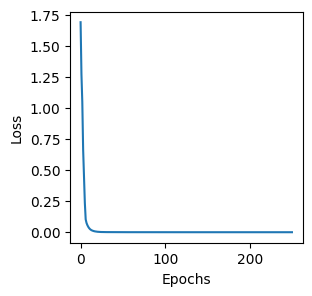

In [ ]:
_, ax = plt.subplots(figsize=(3,3))
ax.plot(history.epoch, history.history['loss'])
ax.set(xlabel='Epoch', ylabel='Loss')

# テスト

313/313 [==============================] - 1s 2ms/step


[Text(0.5, 0, 'x1'), Text(0, 0.5, 'x2')]

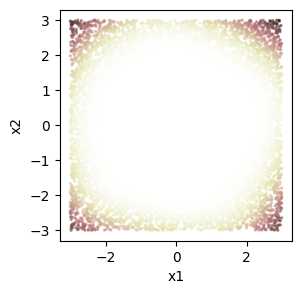

In [ ]:
# サンプル数
samples = 10000

# テストデータの生成
x1 = np.random.uniform(-3, 3, samples)
x2 = np.random.uniform(-3, 3, samples)
test = np.array([x1, x2]).T

# 再構成
reconstructed_test = model.predict(test)

# 異常度
A = np.linalg.norm(test - reconstructed_test,axis=1)**2
q = np.exp(-A)

# 可視化
fig, ax = plt.subplots(figsize=(3,3))

313/313 [==============================] - 1s 3ms/step


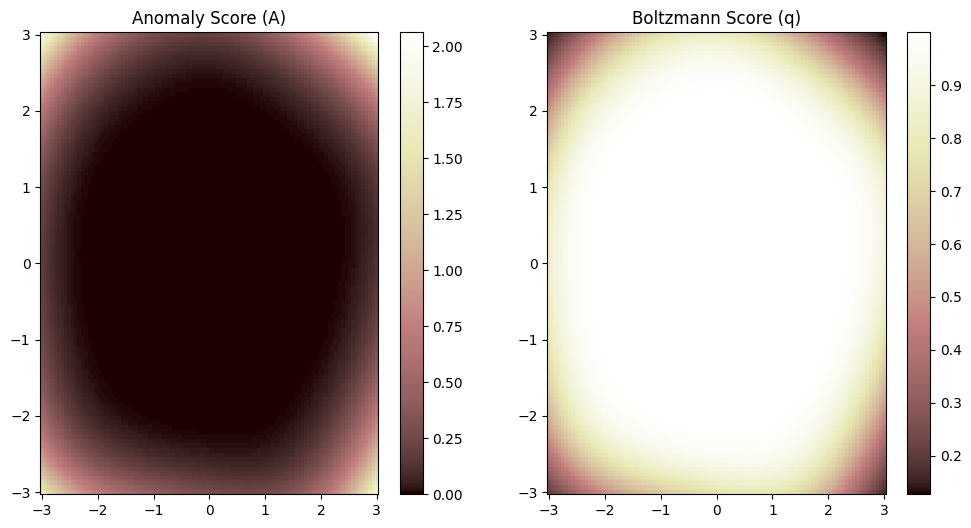

In [ ]:
# グリッドの作成
grid_x, grid_y = np.meshgrid(np.linspace(-3, 3, 100), np.linspace(-3, 3, 100))
grid_shape = grid_x.shape
grid = np.stack([grid_x.ravel(), grid_y.ravel()], axis=1)

# グリッド上での再構成と異常度の計算
reconstructed_grid = model.predict(grid)
A_grid = np.linalg.norm(grid - reconstructed_grid, axis=1)**2
q_grid = np.exp(-A_grid)

# カラーメッシュのプロット
A_grid = A_grid.reshape(grid_shape)
q_grid = q_grid.reshape(grid_shape)

fig, ax = plt.subplots(1, 2, figsize=(12, 6))
mesh1 = ax[0].pcolormesh(grid_x, grid_y, A_grid, shading='auto', cmap='pink')
mesh2 = ax[1].pcolormesh(grid_x, grid_y, q_grid, shading='auto', cmap='pink')

plt.colorbar(mesh1, ax=ax[0])
plt.colorbar(mesh2, ax=ax[1])

ax[0].set_title('Anomaly Score (A)')
ax[1].set_title('Boltzmann Score (q)')

plt.show()
